*Example of how to generate a 3d contour plot

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

np.random.seed(0)

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

## First we demonstrate how to minimize the loss for a single training iteration.

### Define input

In [37]:
X=np.array(([0.1,0.1],[3,5],[5,1],[10,1]),dtype=float)
print(X)

[[ 0.1  0.1]
 [ 3.   5. ]
 [ 5.   1. ]
 [10.   1. ]]


### Define output
    I have added a new point to train the neural network with low values because
    the low values were not reasonable.

In [38]:
y=np.array(([5],[75],[80],[93]),dtype=float)
print(y)

[[ 5.]
 [75.]
 [80.]
 [93.]]


### Scale / Normalize Input and Output
note: so we compare "apples to apples"

In [39]:
X=X/np.amax(X,axis=0)
y=y/100
print(X)
print(y)

[[0.01 0.02]
 [0.3  1.  ]
 [0.5  0.2 ]
 [1.   0.2 ]]
[[0.05]
 [0.75]
 [0.8 ]
 [0.93]]


### Initialize and Evaluate the Network
note: notice the results are terrible because we have not yet trained the network

In [40]:
NN=Neural_Network()

In [41]:
yH=NN.forward(X)

In [42]:
yH

array([[0.76066914],
       [0.8245129 ],
       [0.80013497],
       [0.82552633]])

In [43]:
y

array([[0.05],
       [0.75],
       [0.8 ],
       [0.93]])

### Calculating the Gradient
note: we are trying to move in the direction of the negative gradient (gradient descent) to minimize the cost function 

In [44]:
cost1=NN.costFunction(X,y)

In [45]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [46]:
dJdW1

array([[-0.00102474, -0.00192746, -0.0022059 ],
       [ 0.0010301 ,  0.00217823,  0.00218799]])

In [47]:
dJdW2

array([[0.06254594],
       [0.06188031],
       [0.06265464]])

In [48]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost2 = NN.costFunction(X,y)
print(cost1,cost2)

[0.26075878] [0.23034032]


### Training to Get an Accuracy of 99.9%

In [49]:
# we would like to keep track of the number of iterations it takes to achieve this accuracy
num_iterations = 0
# we would like to store the costs at each iteration
costs = []


# continue to train until it raches the desired accuracy
while 1 - NN.costFunction(X, y) < .99999:
    dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
    cost = NN.costFunction(X, y)
    costs.append(cost)
    num_iterations += 1 # another itration has passed
    
iterations = np.arange(0, num_iterations)

print(num_iterations)

1482


Text(0, 0.5, 'cost')

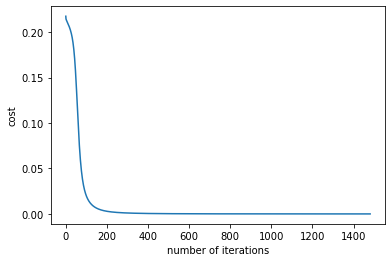

In [50]:
plt.plot(iterations, costs)
plt.xlabel("number of iterations")
plt.ylabel("cost")

In [51]:
yH=NN.forward(X)

In [52]:
yH


array([[0.05336505],
       [0.7498782 ],
       [0.80078529],
       [0.92716779]])

In [53]:
X1=np.array(([0.001,0.001],[0.2,0.2],[1,1]),dtype=float) # this is a trial data to see how the network is trained at 
                                                          # low values

In [54]:
yH1=NN.forward(X1)

In [55]:
yH1

array([[0.046994  ],
       [0.34906536],
       [0.93513692]])

Let us create now a big set of inputs

In [56]:
x = np.linspace(0,1,5)
y = np.linspace(0,1,2)
X,Y = np.meshgrid(x,y)


In [57]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [58]:
Y

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [59]:
X.shape

(2, 5)

In [60]:
XX=X.flatten()

In [61]:
XX

array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  ])

In [62]:
XX.shape

(10,)

In [63]:
Y.shape

(2, 5)

In [64]:
YY=Y.flatten()

In [65]:
YY

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [66]:
UU=np.concatenate((XX,YY))

In [67]:
UU.shape

(20,)

In [68]:
UU=UU.reshape(2,10)

In [69]:
UU # UU has now the x,y coordinates that we are going to use

array([[0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [81]:
UU=UU.T # This operation takes the transpose of the matrix UU so we can feed it into forward()

In [82]:
UU

array([[0.  , 0.  ],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.75, 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.25, 1.  ],
       [0.5 , 1.  ],
       [0.75, 1.  ],
       [1.  , 1.  ]])

In [83]:
Ybig=NN.forward(UU)

In [84]:
Ybig

array([[0.04642608],
       [0.37779083],
       [0.76936016],
       [0.88987259],
       [0.92385157],
       [0.22605472],
       [0.69073377],
       [0.87406672],
       [0.92078629],
       [0.93513692]])

In [85]:
Ybig1=Ybig.reshape((2,5))

In [86]:
Ybig1

array([[0.04642608, 0.37779083, 0.76936016, 0.88987259, 0.92385157],
       [0.22605472, 0.69073377, 0.87406672, 0.92078629, 0.93513692]])

# So this last cell represents the z coordinat in our plot

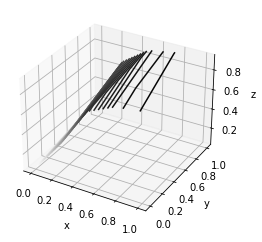

In [87]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Ybig1, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

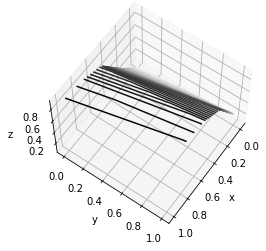

In [88]:
ax.view_init(60, 35)
fig
